In [1]:
import os
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
builder = tfds.ImageFolder("Img_dataset")
print(builder.info)

tfds.core.DatasetInfo(
    name='image_folder',
    full_name='image_folder/1.0.0',
    description="""
    Generic image classification dataset.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    data_dir='/home/riri/tensorflow_datasets/image_folder/1.0.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=87),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=6505, num_shards=1>,
        'train': <SplitInfo num_examples=22566, num_shards=1>,
    },
    citation="""""",
)


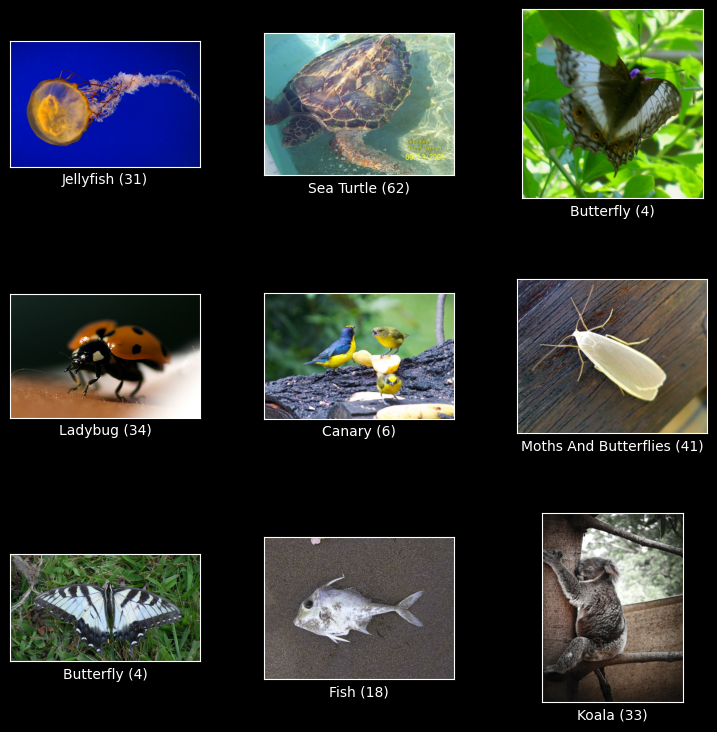

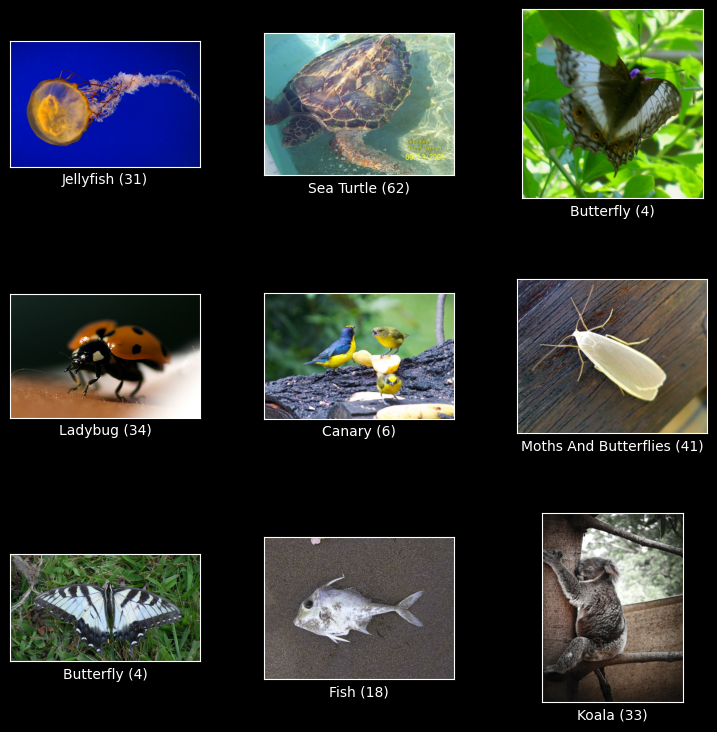

In [4]:
train = builder.as_dataset(split='train', shuffle_files=True)
tfds.show_examples(train, builder.info)

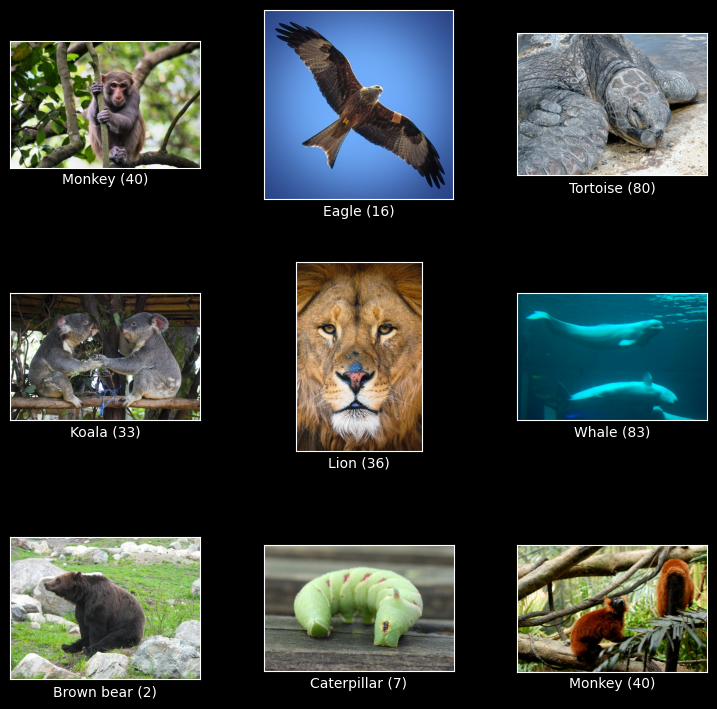

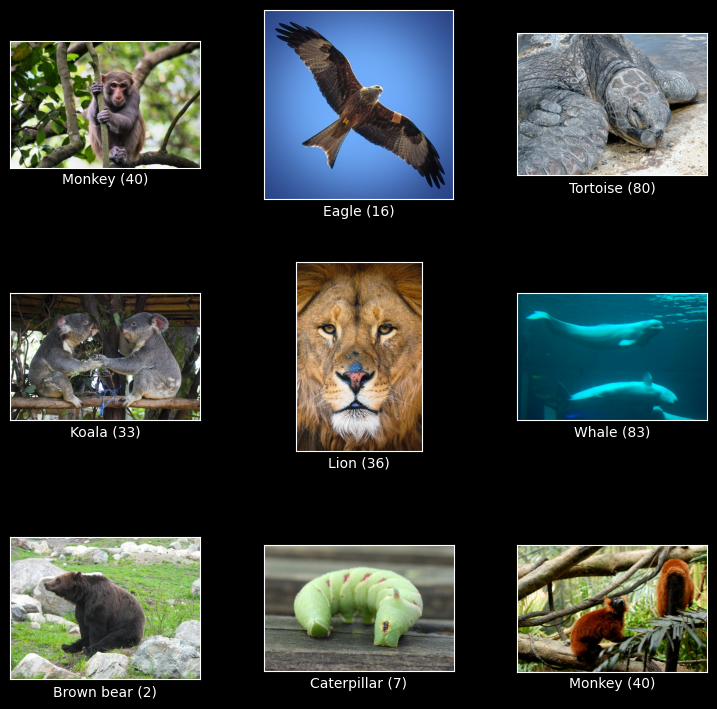

In [5]:
test = builder.as_dataset(split='test', shuffle_files=True)
tfds.show_examples(test, builder.info)

In [6]:
builder.info.splits.keys()

dict_keys(['test', 'train'])

- Preprocessing.

In [7]:
from dataclasses import dataclass

@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES: int = len(builder.info.features['label'].names)
    IMG_HEIGT: int = 64
    IMG_WIDTH: int = 64
    
@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS: int = 100
    BATCH_SIZE: int = 256
    LEARNING_RATE: int = 0.001

In [13]:
assert isinstance(train, tf.data.Dataset)

In [14]:
example = next(iter(train))
print(example.keys())

dict_keys(['image', 'image/filename', 'label'])


In [31]:
def preprocess_dataset(dataset: tf.data.Dataset, shuffle: bool = False):
    def preprocess_image(image):
        # img = tf.image.convert_image_dtype(image, tf.float32)
        img = tf.image.resize_with_pad(image, 
                                       target_height=DatasetConfig.IMG_HEIGT,
                                       target_width=DatasetConfig.IMG_WIDTH)
        img /= 255.0
        
        return img
    
    ds = dataset.cache()
    ds = ds.map(preprocess_image)
    ds = ds.batch(batch_size=TrainingConfig.BATCH_SIZE)
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataset), reshuffle_each_iteration=True)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    
    return ds

In [32]:
preprocess_dataset(train)

TypeError: in user code:

    File "<ipython-input-31-211a5b2d1cad>", line 4, in preprocess_image  *
        img = tf.image.resize_with_pad(image,

    TypeError: Expected any non-tensor type, but got a tensor instead.
